In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train=pd.read_csv("sephora_train_data.csv")
test=pd.read_csv("sephora_test_data.csv")
train.head(5)

,Unnamed: 0,product_url,overall_ratings,is_vegan,is_cruelty_free,award_wins,is_clean_product,has_clinical_results,has_alcohol,price,...,brand_bareMinerals,brand_belif,brand_fresh,brand_goop,brand_innisfree,brand_lilah b.,brand_philosophy,brand_rms beauty,brand_tarte,brand_trèStiQue
0,0,https://www.sephora.com/product/midnight-recov...,4.5,0,0,0,0,0,0,32.0,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.sephora.com/product/dermal-quench-...,4.0,0,1,0,0,1,0,98.0,...,0,0,0,0,0,0,0,0,0,0
2,2,https://www.sephora.com/product/caudalie-vinoc...,4.5,1,0,0,1,0,1,28.0,...,0,0,0,0,0,0,0,0,0,0
3,3,https://www.sephora.com/product/face-finishing...,4.5,0,0,0,0,0,1,75.0,...,0,0,0,0,0,0,0,0,0,0
4,4,https://www.sephora.com/product/ole-henriksen-...,4.0,0,1,0,1,1,1,38.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
y_train_dtr=train['overall_ratings']
X_train_dtr=pd.get_dummies(train.drop(['overall_ratings', 'Unnamed: 0', 'product_url'], axis=1))

In [64]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_train_dtr, y_train_dtr, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((658, 162), (282, 162))

In [30]:
grid_values={'ccp_alpha': np.linspace(0,0.1,201)}
dtr=DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20,random_state=88)
dtr_cv=GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5,verbose=0)
dtr_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0....
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.

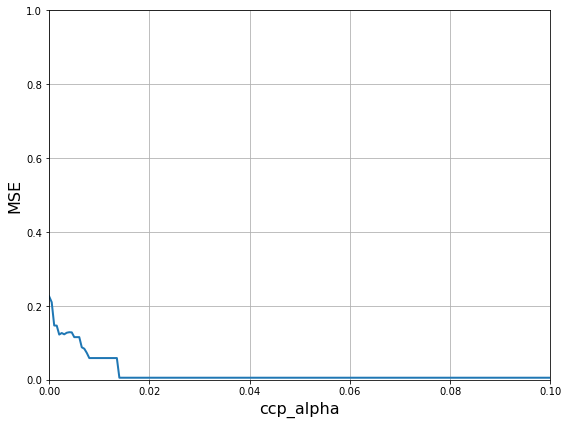

In [32]:
ccp_alpha=dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores=-dtr_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8,6))
plt.xlabel('ccp_alpha',fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.plot(ccp_alpha, R2_scores, linewidth=2)
plt.grid(True, which='both')
plt.xlim([0,0.1])
plt.ylim([0.0,1])
plt.tight_layout()
plt.show()

In [36]:
dtr_cv.cv_results_['param_ccp_alpha'][np.argmax(dtr_cv.cv_results_['mean_test_score'])]

0.014

In [44]:
DR = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20,random_state=88).fit(X_train_dtr, y_train_dtr)

In [42]:
def OSR2(model, X_test, y_test, y_train):
    y_pred=model.predict(X_test)
    SSE=np.sum((y_test-y_pred)**2)
    SST=np.sum((y_test-np.mean(y_train))**2)
    return(1-SSE/SST)
y_test=test['overall_ratings']
X_test=test.drop(['overall_ratings', 'product_url', 'Unnamed: 0'], axis=1)
y_train=train['overall_ratings']

In [46]:
y_pred = DR.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(test['overall_ratings'], y_pred)
mae = mean_absolute_error(test['overall_ratings'], y_pred)
print('mean squared error:', mse)
print('mean abosolute error:', mae)

mean squared error: 0.22193244449153063
mean abosolute error: 0.359992054282948


In [54]:
def convert_to_bins(results):
    predict = np.zeros((len(results), 11))
    bins = (y_pred/.5).round()
    for i,j in enumerate(bins):
        predict[i, int(j)] = 1
    return predict

def multi_bin(dataset):
    solution = np.zeros([(len(dataset)), 11])
    for i, j in enumerate(dataset):
        solution[i][int(j*2)] = 1
    return solution

In [55]:
converted = convert_to_bins(y_pred)
y_multitrain = multi_bin(train['overall_ratings'].values)
y_multitest = multi_bin(test['overall_ratings'].values)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print ("\nAccuracy:", accuracy_score(y_multitest, converted))


Accuracy: 0.4703389830508475


In [58]:
y_test=test['overall_ratings']
X_test_dtr=pd.get_dummies(test.drop(['overall_ratings', 'Unnamed: 0', 'product_url'], axis=1))
print('Cross-validated R2:',round(dtr_cv.best_score_,5))
print('OSR2:',round(OSR2(dtr_cv.best_estimator_, X_test_dtr, y_test, y_train),5))

Cross-validated R2: -0.00508
OSR2: 0.00049


# Boosting Regressor with CV

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=100, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2359            6.03s
         2           0.2358            4.98s
         3           0.2358            4.65s
         4           0.2358            4.49s
         5           0.2358            3.99s
         6           0.2358            3.98s
         7           0.2358            3.98s
         8           0.2357            3.98s
         9           0.2357            3.97s
        10           0.2357            3.78s
        20           0.2356            3.36s
        30           0.2354            3.21s
        40           0.2352            3.08s
        50           0.2351            3.07s
        60           0.2349            3.00s
        70           0.2348            2.94s
        80           0.2346            2.92s
        90           0.2345            2.88s
       100           0.2343            2.84s
       200           0.2330            2.64s
       300           0.2318            2.48s
       40

GradientBoostingRegressor(learning_rate=0.001, max_depth=100, max_leaf_nodes=3,
                          min_samples_leaf=10, n_estimators=2000,
                          random_state=88, verbose=1)

In [66]:
print('OSR2:', round(OSR2(gbr, X_test, y_test, y_train), 5))

OSR2: 0.03207


In [69]:
import time

In [70]:
grid_values = {'n_estimators': np.logspace(9, 16, num=8, base=2, dtype='int32'),
               'learning_rate': [0.005],
               'max_leaf_nodes': np.linspace(2, 10, 9, dtype='int32'),
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]}

tic = time.time()

gbr2 = GradientBoostingRegressor()
gbr_cv = GridSearchCV(gbr2, param_grid=grid_values, scoring='r2', cv=5)
gbr_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 8606.42 s


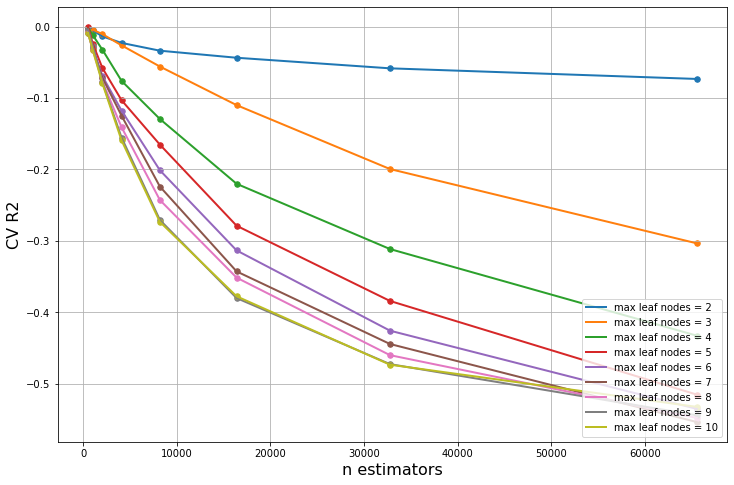

In [71]:
n_estimators = gbr_cv.cv_results_['param_n_estimators'].data
R2_scores = gbr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()